In [1]:
import pandas as pd
import numpy as np
import re
import string
import spacy
import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
text_data= pd.read_csv("C:\\Users\\snmuj\\Downloads\\GenSim-Topic-Modeling-main\\GenSim-Topic-Modeling-main\\man-news.csv")
print(text_data.head(2))
print(len(text_data))

   Id                                               Text
0   1                  بحثا عن الأنا المرأة والآخر الرجل
1   2  الرجال في اسبانيا مؤخرا وكان عام الرجال ولهذا ...
9998


In [3]:
def clean_text(text): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [4]:
import nltk
nltk.download('stopwords') # run this one time

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snmuj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
text_data.dropna(axis = 0, how ='any',inplace=True) 
text_data['Text'] = text_data['Text'].apply(clean_text)
text_data['Num_words_text'] = text_data['Text'].apply(lambda x:len(str(x).split())) 
print(len(text_data))
max_text_data_sentence_length  = text_data['Num_words_text'].max()
mask = (text_data['Num_words_text'] < 100) & (text_data['Num_words_text'] >=20)

9998


In [6]:
from nltk.corpus import stopwords
stop_words = stopwords.words('function-ar')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
text_data['Text']=text_data['Text'].apply(remove_stopwords)

In [7]:
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

In [8]:
!python -m spacy download en_core_web_sm

  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.0
    Uninstalling en-core-web-sm-2.2.0:
      Successfully uninstalled en-core-web-sm-2.2.0
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [9]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [10]:
import spacy
spacy.load("en_core_web_sm")

import spacy
spacy.load("xx_ent_wiki_sm")

import xx_ent_wiki_sm
nlp = xx_ent_wiki_sm.load()

In [11]:
def lemmatization(texts,allowed_postags=['NOUN', 'ADJ', 'VERB']):
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [12]:
text_list=text_data['Text'].tolist()
print(text_list[1])
tokenized_texts = lemmatization(text_list)
print(tokenized_texts[1])

الرجال اسبانيا مؤخرا الرجال يعاني كبار السن
[]


### Create vocabulary dictionary and document term matrix

In [13]:
dictionary = corpora.Dictionary(tokenized_texts)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_texts]

In [14]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [15]:
lda_model.print_topics()

[(0,
  '0.014*"العالم" + 0.013*"الأمر" + 0.012*"المملكة" + 0.011*"الكبير" + 0.011*"العمل" + 0.008*"يعانون" + 0.008*"السعودية" + 0.007*"المواطن" + 0.006*"وكالة" + 0.006*"كافة"'),
 (1,
  '0.312*"الرجل" + 0.009*"نفسه" + 0.007*"المرأة" + 0.006*"الأول" + 0.005*"أثناء" + 0.004*"شخصية" + 0.004*"الخير" + 0.004*"سلطان" + 0.004*"أمام" + 0.004*"المسن"'),
 (2,
  '0.074*"الرجل" + 0.015*"رجال" + 0.014*"الشرطة" + 0.008*"دراسة" + 0.008*"جديدة" + 0.006*"عاما" + 0.006*"الحدود" + 0.006*"الشباب" + 0.005*"الواقع" + 0.004*"القبض"'),
 (3,
  '0.013*"وجود" + 0.013*"الحديدي" + 0.009*"عملية" + 0.009*"أيضا" + 0.008*"حينما" + 0.008*"أفضل" + 0.008*"تحقيق" + 0.007*"تقدم" + 0.006*"نساء" + 0.005*"مجال"'),
 (4,
  '0.032*"اليوم" + 0.013*"الشيخ" + 0.013*"محمد" + 0.013*"الله" + 0.012*"الرياض" + 0.007*"الدين" + 0.007*"إحدى" + 0.006*"الأكثر" + 0.006*"الآن" + 0.005*"مدينة"'),
 (5,
  '0.061*"الشرطة" + 0.018*"عاما" + 0.012*"رجلا" + 0.011*"القبض" + 0.010*"مركز" + 0.008*"وذكرت" + 0.007*"يبلغ" + 0.007*"الحادث" + 0.007*"النار" + 0

In [16]:
# Visualize the topics
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\snmuj\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.319185  0.062725       1        1  23.193283
2     -0.167901 -0.079338       2        1  12.736627
8      0.077205  0.259784       3        1  11.403418
5      0.053100 -0.187471       4        1  10.850340
9      0.056065 -0.013863       5        1   7.368873
4      0.063975 -0.002414       6        1   7.347423
7      0.061372 -0.034191       7        1   7.185615
6      0.058910 -0.001865       8        1   7.058188
0      0.055477  0.010277       9        1   6.617846
3      0.060982 -0.013645      10        1   6.238387, topic_info=         Term         Freq        Total Category  logprob  loglift
22      الرجل  3848.000000  3848.000000  Default  30.0000  30.0000
93     الرجال  1036.000000  1036.000000  Default  29.0000  29.0000
751    الشرطة   395.000000   395.000000  Default  28.0000  28.0000
801     اليوم   109.000000   109.000000  Default  27.0000  27.0000
9        عاما   131.000000   131.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1464     بناء     8.659840     9.335341  Topic10  -5.8248   2.6993
3992     بصحة     8.311146     8.986605  Topic10  -5.8659   2.6963
1777  الاطفال     7.938506     8.613949  Topic10  -5.9118   2.6928
1246     سبعة     7.888435     8.563910  Topic10  -5.9181   2.6923
777     الثدي     7.843517     8.518937  Topic10  -5.9238   2.6918

[388 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
2103      4  0.963435  أبناء
3266      8  0.951498   أثبت
2391      1  0.991908  أثناء
3578      7  0.963885  أحداث
1824      8  0.967096   أحمد
...     ...       ...    ...
48        1  0.988414   يقول
75       10  0.909386   يقوم
1111      7  0.965435   يمثل
1539      2  0.943465   يوجد
178       2  0.965876   يوما

[402 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 9, 6, 10, 5, 8, 7, 1, 4])

In [17]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.
# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.490050348508172

Coherence Score:  0.5392224919038281


### Method to find optimal number of topics
Code from:https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#14computemodelperplexityandcoherencescore


In [18]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [19]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_texts, start=1, limit=11, step=1)

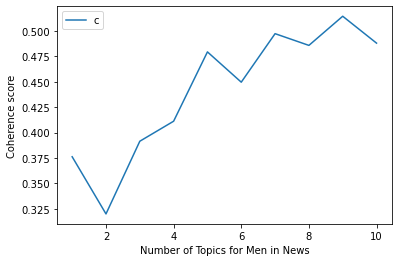

In [20]:
#Print the coherence scores
# Show graph
limit=11; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics for Men in News")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show() 

In [21]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.3762
Num Topics = 2  has Coherence Value of 0.32
Num Topics = 3  has Coherence Value of 0.3915
Num Topics = 4  has Coherence Value of 0.4112
Num Topics = 5  has Coherence Value of 0.4794
Num Topics = 6  has Coherence Value of 0.4496
Num Topics = 7  has Coherence Value of 0.4973
Num Topics = 8  has Coherence Value of 0.4858
Num Topics = 9  has Coherence Value of 0.5145
Num Topics = 10  has Coherence Value of 0.488


In [22]:
# Select the model and print the topics
optimal_model = model_list[9]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.018*"العالم" + 0.013*"النساء" + 0.010*"صحيفة" + 0.009*"النار" + 0.009*"وقالت" + 0.008*"مجموعة" + 0.007*"دولار" + 0.007*"الرجل" + 0.006*"تناول" + 0.006*"المسلسل"'),
 (1,
  '0.073*"الشرطة" + 0.029*"الرجل" + 0.013*"عاما" + 0.010*"تلقى" + 0.009*"رجلا" + 0.009*"باسم" + 0.009*"الأكثر" + 0.007*"القبض" + 0.007*"اعتقلت" + 0.006*"وذكرت"'),
 (2,
  '0.014*"اليوم" + 0.011*"وجود" + 0.010*"الرجال" + 0.010*"الرجل" + 0.010*"أفضل" + 0.010*"مهرجان" + 0.008*"أيضا" + 0.008*"الجنادرية" + 0.008*"المهرجان" + 0.007*"الرياض"'),
 (3,
  '0.358*"الرجل" + 0.006*"المرأة" + 0.006*"المسن" + 0.005*"الأول" + 0.004*"الأمر" + 0.004*"بشكل" + 0.004*"زوجاتهم" + 0.004*"بينما" + 0.003*"مكان" + 0.003*"الشرطة"'),
 (4,
  '0.016*"مليون" + 0.014*"دولار" + 0.013*"المملكة" + 0.010*"الفيلم" + 0.010*"بعدما" + 0.009*"الرجل" + 0.009*"المناسب" + 0.008*"سلسلة" + 0.008*"الشيخ" + 0.007*"كافة"'),
 (5,
  '0.041*"الرجل" + 0.013*"الكبير" + 0.010*"فترة" + 0.008*"جديدة" + 0.008*"وزوجته" + 0.007*"الانتحار" + 0.007*"الحب" + 0.006*"الأنباء"

In [23]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\snmuj\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.319185  0.062725       1        1  23.191320
2     -0.167901 -0.079338       2        1  12.741544
8      0.077205  0.259784       3        1  11.402545
5      0.053100 -0.187471       4        1  10.850185
9      0.056065 -0.013863       5        1   7.368883
4      0.063975 -0.002414       6        1   7.347422
7      0.061372 -0.034191       7        1   7.183675
6      0.058910 -0.001865       8        1   7.058191
0      0.055477  0.010277       9        1   6.617843
3      0.060982 -0.013645      10        1   6.238392, topic_info=         Term         Freq        Total Category  logprob  loglift
22      الرجل  3848.000000  3848.000000  Default  30.0000  30.0000
93     الرجال  1036.000000  1036.000000  Default  29.0000  29.0000
751    الشرطة   395.000000   395.000000  Default  28.0000  28.0000
801     اليوم   109.000000   109.000000  Default  27.0000  27.0000
9        عاما   131.000000   131.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1464     بناء     8.659847     9.335345  Topic10  -5.8248   2.6993
3992     بصحة     8.311153     8.986609  Topic10  -5.8659   2.6963
1777  الاطفال     7.938512     8.613952  Topic10  -5.9118   2.6928
1246     سبعة     7.888441     8.563914  Topic10  -5.9181   2.6923
777     الثدي     7.843523     8.518940  Topic10  -5.9238   2.6918

[388 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
2103      4  0.963448  أبناء
3266      8  0.951498   أثبت
2391      1  0.991991  أثناء
3578      7  0.964131  أحداث
1824      8  0.967096   أحمد
...     ...       ...    ...
48        1  0.988495   يقول
75       10  0.909385   يقوم
1111      7  0.965686   يمثل
1539      2  0.943118   يوجد
178       2  0.965515   يوما

[402 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 9, 6, 10, 5, 8, 7, 1, 4])